# Python for Finance
### How compute portfolio simple returns, daily returns and volitility

### Video Link
[Python For Finance](https://youtu.be/O-O1WclwXck?si=YmSguoHPY_u-kHx4)

[STOCK PORTFOLIO DATAFRAME]


,OXSQ,SPLG
Date,,
2013-01-02,2.2077,13.97
2013-01-03,2.2312,13.98
2013-01-04,2.2376,14.01
2013-01-07,2.2547,14.01
2013-01-08,2.2376,13.95
...,...,...
2023-12-26,2.8800,55.93
2023-12-27,2.8800,56.05
2023-12-28,2.8600,56.08


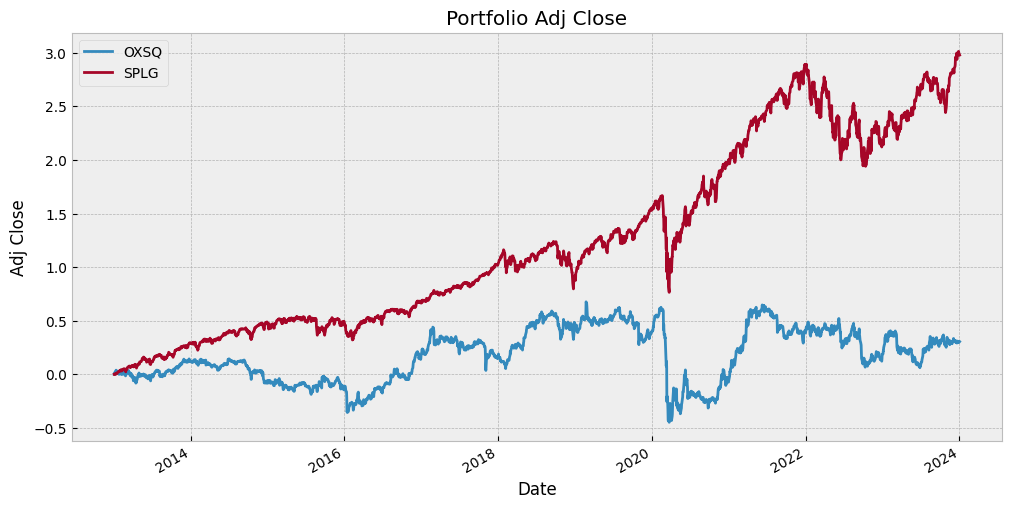

[CUMULATIVE RETURNS DATAFRAME]


,OXSQ,SPLG
Date,,
2013-01-02,0.000000,0.000000
2013-01-03,1.064456,0.071582
2013-01-04,1.354351,0.286328
2013-01-07,2.128912,0.286328
2013-01-08,1.354351,-0.143164
...,...,...
2023-12-26,30.452507,300.357910
2023-12-27,30.452507,301.216893
2023-12-28,29.546587,301.431639


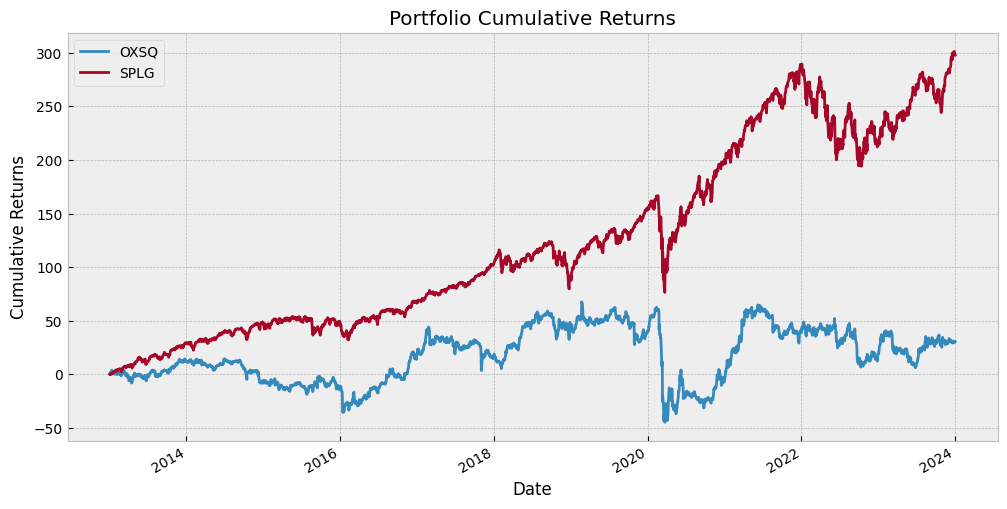

[DAILY RETURNS DATAFRAME]


,OXSQ,SPLG
Date,,
2013-01-02,NaN,NaN
2013-01-03,1.064456,0.071582
2013-01-04,0.286841,0.214592
2013-01-07,0.764212,0.000000
2013-01-08,-0.758416,-0.428266
...,...,...
2023-12-26,-0.346021,0.430957
2023-12-27,0.000000,0.214554
2023-12-28,-0.694444,0.053524


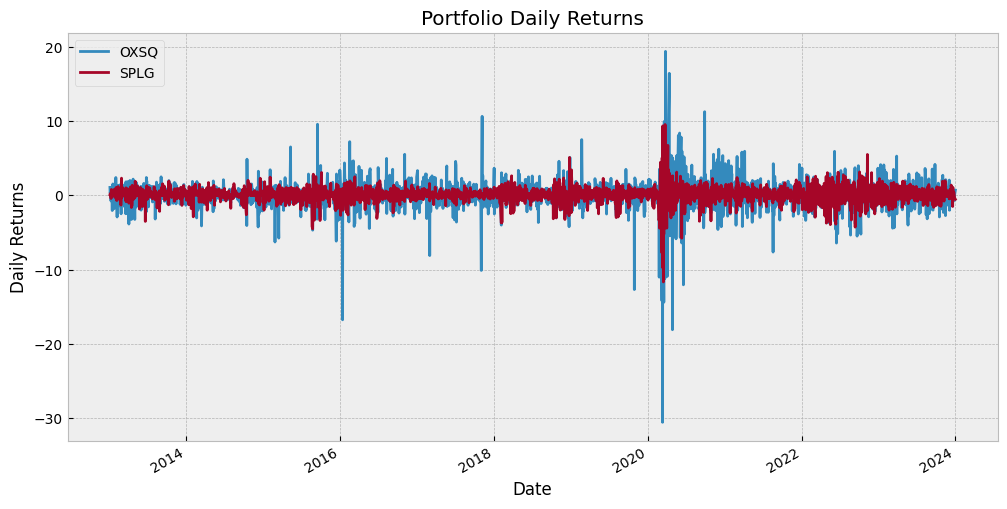

[Daily Returns Correlation]


,OXSQ,SPLG
OXSQ,1.00,0.39
SPLG,0.39,1.00


Correlation Explained:
	- Value Range: Correlation values range from -1 to +1.
	- Positive Value (0 to +1): Indicates a positive relationship between the returns of two stocks.
	  As one stock's return increases, the other's tends to increase as well.
	  A value closer to +1 signifies a stronger positive correlation.
	- Negative Value (-1 to 0): Suggests a negative relationship.
	  As one stock's return increases, the other's tends to decrease.
	  A value closer to -1 indicates a stronger negative correlation.
	- Value Near Zero: Implies little to no linear relationship between the returns of the two stocks.
	- Value of +1 or -1: Indicates a perfect positive or negative linear relationship, respectively.
	- Interpretation: High positive correlation might suggest similar factors affect the stocks similarly,
	  while high negative correlation could indicate opposite reactions to the same factors.
	- Importance: Understanding correlation helps in diversifying a portfolio.
	  Stocks with l

,OXSQ,SPLG
OXSQ,4.09,0.85
SPLG,0.85,1.16


Covariance Explained:
	- Positive Value: Indicates that the returns of two stocks tend to move in the same direction.
	- Negative Value: Suggests that the returns of the two stocks tend to move in opposite directions.
	- Value Near Zero: Implies a very weak or no linear relationship between the returns of the two stocks.
	- Higher Absolute Value: Signifies a stronger relationship between the stock movements.
	  The higher the number (positive or negative), the stronger the relationship.
	- Interpretation: Positive covariance can suggest that stocks could be used together for a growth-focused strategy,
	  while negative covariance could be used for hedging.
	- Limitation: Covariance alone does not indicate the magnitude of movements;
	  it should be considered alongside other metrics like correlation coefficients and volatility.

[The Portfolio's Volitility]


,Volatility(STD)
OXSQ,2.02
SPLG,1.08


The higher the volatility, the riskier the security.
The lower the volatility, the safer the security


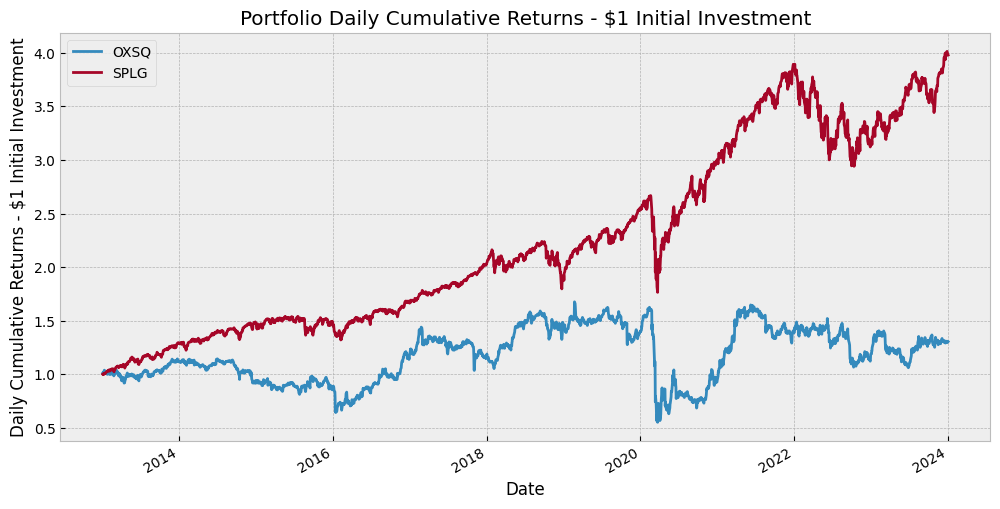

[STARTING WITH 1$ INVESTMENT]
                OXSQ      SPLG
Date                          
2013-01-04  1.013544  1.002863 

                OXSQ      SPLG
Date                          
2024-01-02  1.304525  3.979957


In [1]:
from datetime import datetime
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh') # other styles are 'ggplot', 'fivethirtyeight', 'bmh', 'seaborn', 'seaborn-darkgrid'

def get_stock_data(stock_symbols, start_date, end_date, col):
    # get stock data from yahoo finance
    stock_data = yf.download(stock_symbols, start_date, end_date, progress=False, rounding=True)[col]
    return stock_data

def show_portfolio(stock_portfolio, col= 'Adj Close', normalize= False):
    if normalize:
        # normalize the data
        stock_portfolio = (stock_portfolio / stock_portfolio.iloc[0])-1
    # show portfolio
    stock_portfolio.plot(figsize=(12,6))
    plt.legend(loc='upper left')
    plt.title(f'Portfolio {col}')
    plt.ylabel(f'{col}')
    plt.show()

def cumulative_returns(stock_portfolio):
    # show cumulative returns
    cum_returns = ((stock_portfolio / stock_portfolio.iloc[0])-1) * 100
    return cum_returns

def compute_daily_returns(stock_portfolio, times_by_100= True):
    '''Calculation
    df[t] / df[t-1] - 1
    where t is the current time(today) and t-1 is the previous time(yesterday
    for simplicity we will use pct_change() method
    '''
    # calculate daily returns
    if times_by_100:
        daily_ret = stock_portfolio.pct_change(1) * 100
    else:
        daily_ret = stock_portfolio.pct_change(1)
    return daily_ret

# [RUN APP]
def run_app():
    benchmark = 'SPLG'
    # create a protfolio - use FAANG stocks
    stock_symbols = [benchmark, 'OXSQ'] 
    start_date = '2013-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')
    stock_portfolio = get_stock_data(stock_symbols, start_date, end_date, 'Adj Close')
    print('[STOCK PORTFOLIO DATAFRAME]')
    display(stock_portfolio)
    show_portfolio(stock_portfolio, normalize=True)
    cum_returns = cumulative_returns(stock_portfolio)
    print('[CUMULATIVE RETURNS DATAFRAME]')
    display(cum_returns)
    show_portfolio(cum_returns, 'Cumulative Returns')
    daily_returns = compute_daily_returns(stock_portfolio)
    print('[DAILY RETURNS DATAFRAME]')
    display(daily_returns)
    show_portfolio(daily_returns, 'Daily Returns')
    # show the correlation between stocks
    print('[Daily Returns Correlation]')
    display(daily_returns.corr(method='pearson').style.background_gradient(cmap='coolwarm').format(precision=2))
    print(
    'Correlation Explained:\n'
    '\t- Value Range: Correlation values range from -1 to +1.\n'
    '\t- Positive Value (0 to +1): Indicates a positive relationship between the returns of two stocks.\n\t  As one stock\'s return increases, the other\'s tends to increase as well.\n\t  A value closer to +1 signifies a stronger positive correlation.\n'
    '\t- Negative Value (-1 to 0): Suggests a negative relationship.\n\t  As one stock\'s return increases, the other\'s tends to decrease.\n\t  A value closer to -1 indicates a stronger negative correlation.\n'
    '\t- Value Near Zero: Implies little to no linear relationship between the returns of the two stocks.\n'
    '\t- Value of +1 or -1: Indicates a perfect positive or negative linear relationship, respectively.\n'
    '\t- Interpretation: High positive correlation might suggest similar factors affect the stocks similarly,\n\t  while high negative correlation could indicate opposite reactions to the same factors.\n'
    '\t- Importance: Understanding correlation helps in diversifying a portfolio.\n\t  Stocks with low or negative correlation can reduce overall portfolio risk.\n'
    '\t- Caution: Correlation does not imply causation.\n\t  Two stocks may move together or inversely without one directly causing the other\'s movement.'
    )
    # show the covariance between stocks
    print('\n[Daily Returns Covariance]')
    display(daily_returns.cov().style.background_gradient(cmap='coolwarm').format(precision=2))
    print(
    'Covariance Explained:\n'
    '\t- Positive Value: Indicates that the returns of two stocks tend to move in the same direction.\n'
    '\t- Negative Value: Suggests that the returns of the two stocks tend to move in opposite directions.\n'
    '\t- Value Near Zero: Implies a very weak or no linear relationship between the returns of the two stocks.\n'
    '\t- Higher Absolute Value: Signifies a stronger relationship between the stock movements.\n\t  The higher the number (positive or negative), the stronger the relationship.\n'
    '\t- Interpretation: Positive covariance can suggest that stocks could be used together for a growth-focused strategy,\n\t  while negative covariance could be used for hedging.\n'
    '\t- Limitation: Covariance alone does not indicate the magnitude of movements;\n\t  it should be considered alongside other metrics like correlation coefficients and volatility.'
)
# https://www.investopedia.com/terms/c/covariance.asp
    # https://www.investopedia.com/terms/c/correlation.asp
    # https://www.investopedia.com/terms/c/correlationcoefficient.asp
    print("\n[The Portfolio's Volitility]")
    display(daily_returns.std().sort_values(ascending=False).to_frame('Volatility(STD)').style.background_gradient(cmap='coolwarm').format(precision=2))
    print('The higher the volatility, the riskier the security.\nThe lower the volatility, the safer the security')
    # https://www.investopedia.com/terms/v/volatility.asp
    # use 1$ as the initial investment
    initial_investment = 1
    dailyCumulativeSimpleReturns = (compute_daily_returns(stock_portfolio, times_by_100=False) + initial_investment).cumprod()
    show_portfolio(dailyCumulativeSimpleReturns, 'Daily Cumulative Returns - $1 Initial Investment')
    print('[STARTING WITH 1$ INVESTMENT]')
    print(dailyCumulativeSimpleReturns.iloc[[2]], '\n')
    print(dailyCumulativeSimpleReturns.iloc[[-1]])

if __name__ == "__main__":
    run_app()